In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore');

In [8]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
dataset = pd.read_csv('income-dataset.csv', names = columns)

In [9]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['Income'] = labelEncoder.fit_transform(dataset['Income'])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                 32561 non-null int64
Work Class          32561 non-null object
Final Weight        32561 non-null int64
Education           32561 non-null object
Education Number    32561 non-null int64
Marital Status      32561 non-null object
Occupation          32561 non-null object
Relationship        32561 non-null object
Race                32561 non-null object
Sex                 32561 non-null object
Capital Gain        32561 non-null int64
Capital Loss        32561 non-null int64
Hours per Week      32561 non-null int64
Country             32561 non-null object
Income              32561 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001431A9AF6D8>,
      dtype=object)

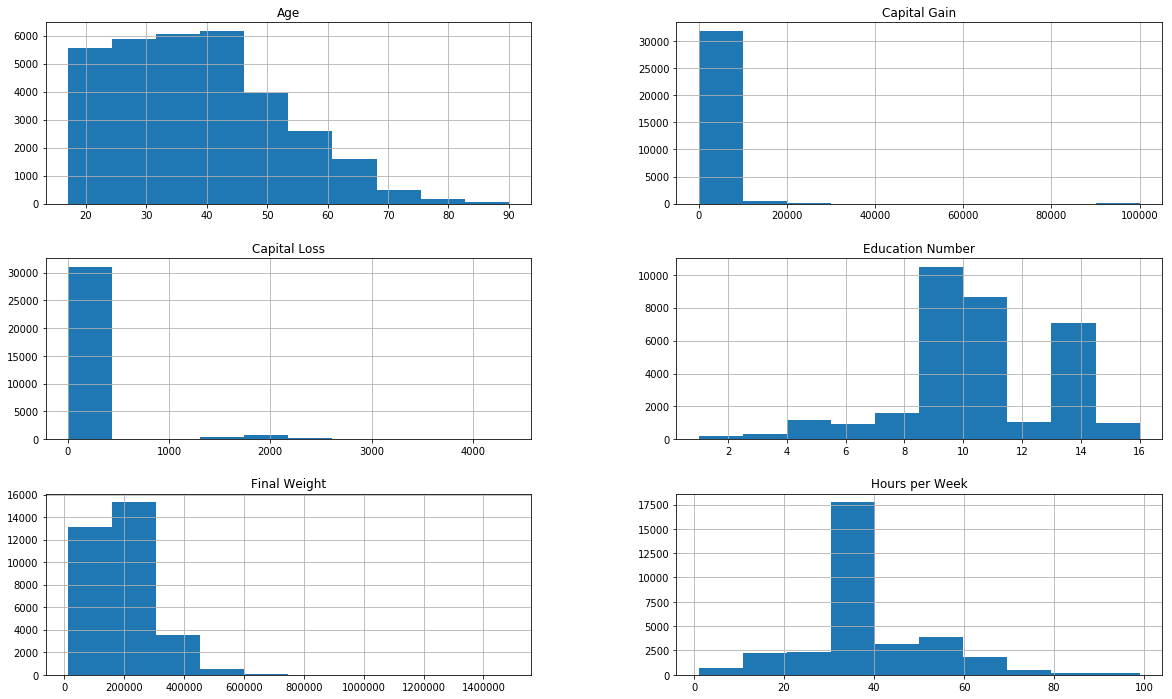

In [11]:
rcParams['figure.figsize'] = 20, 12
dataset[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist()

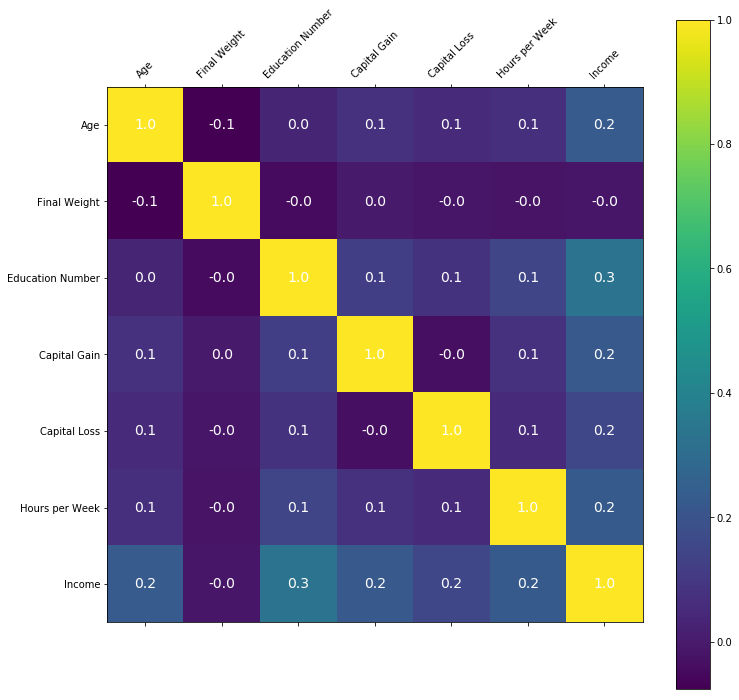

In [12]:
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(len(dataset.corr().columns)), dataset.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(dataset.corr().columns)), dataset.corr().columns.values) 
for (i, j), corr in np.ndenumerate(dataset.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [13]:
dataset['Age'] = pd.cut(dataset['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])            

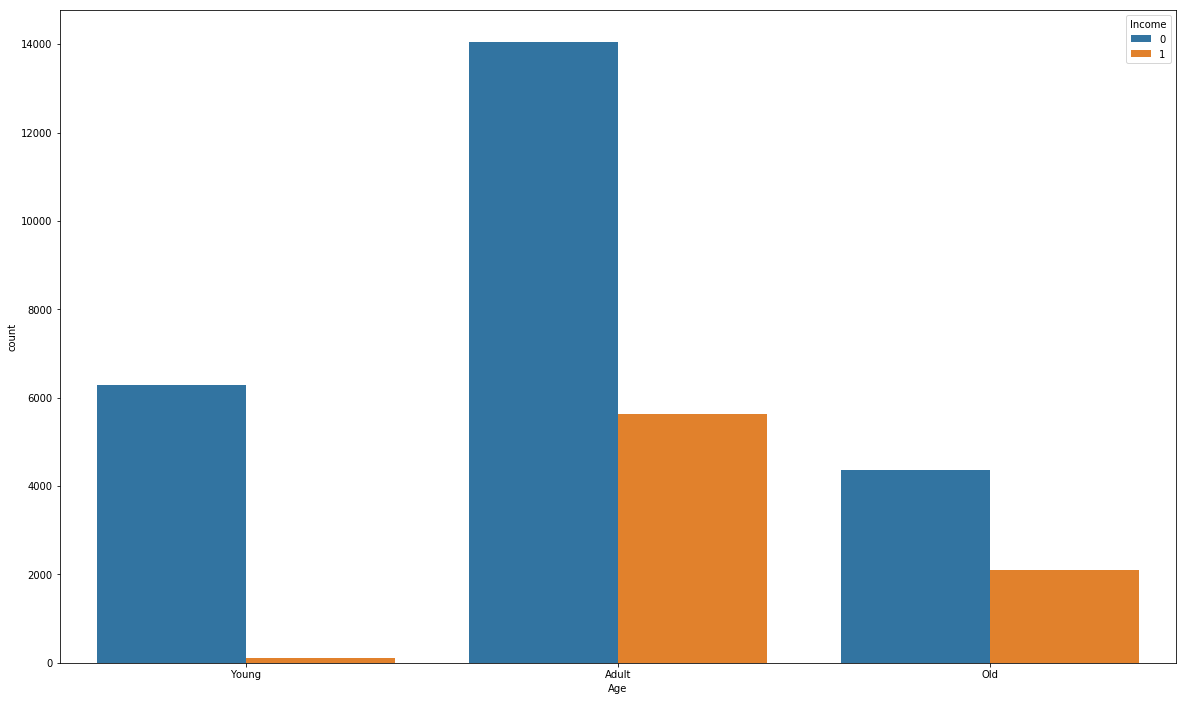

In [14]:
sns.countplot(x = 'Age', hue = 'Income', data = dataset)

In [15]:
dataset['Capital Diff'] = dataset['Capital Gain'] - dataset['Capital Loss']
dataset.drop(['Capital Gain'], axis = 1, inplace = True)
dataset.drop(['Capital Loss'], axis = 1, inplace = True)

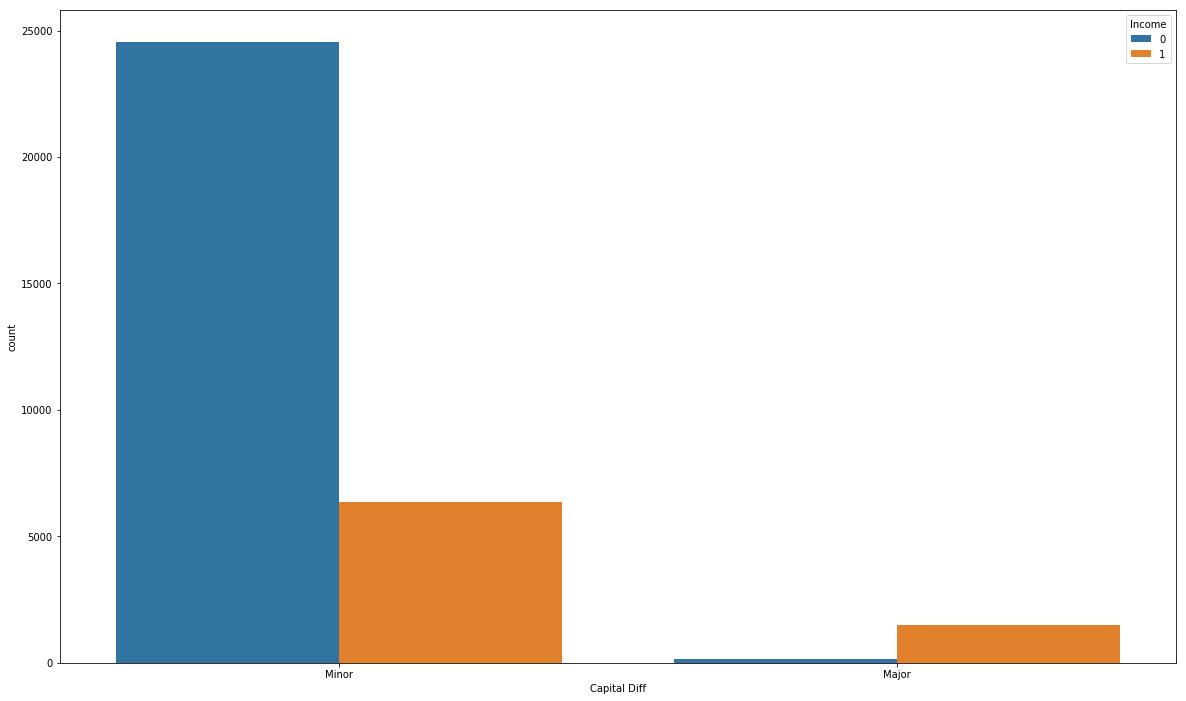

In [16]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = dataset)

In [17]:
dataset.drop(['Final Weight'], axis = 1, inplace = True)

In [18]:
dataset['Hours per Week'] = pd.cut(dataset['Hours per Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

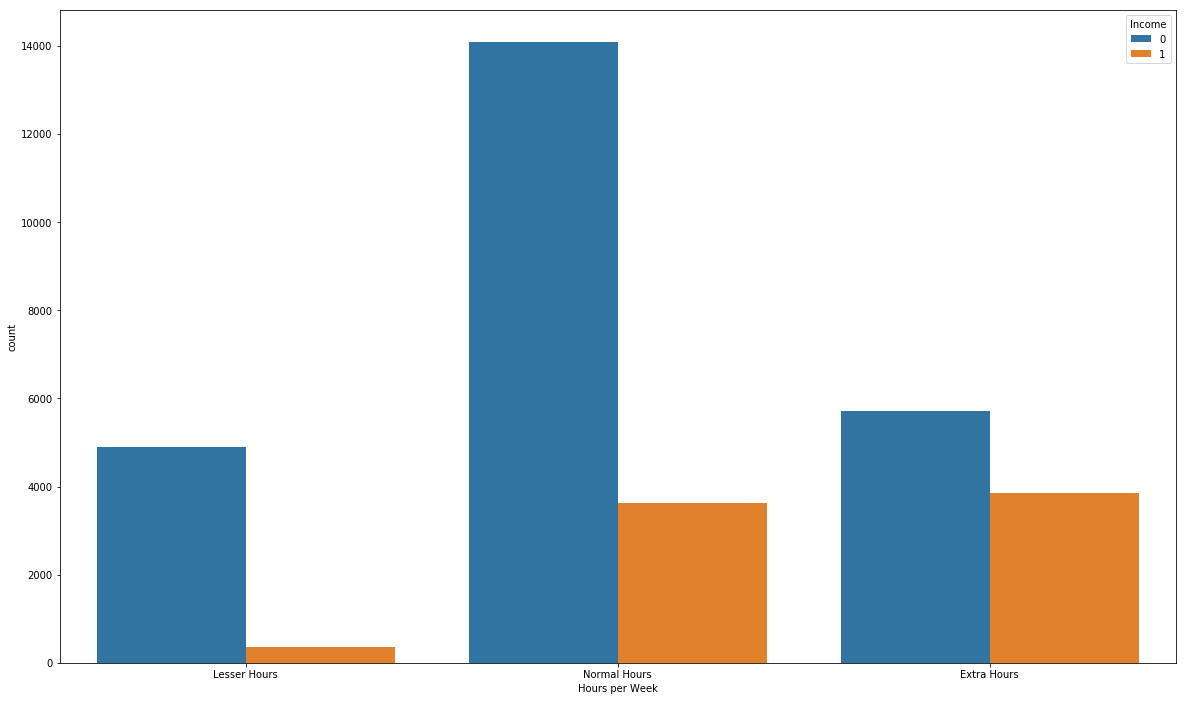

In [19]:
sns.countplot(x = 'Hours per Week', hue = 'Income', data = dataset)

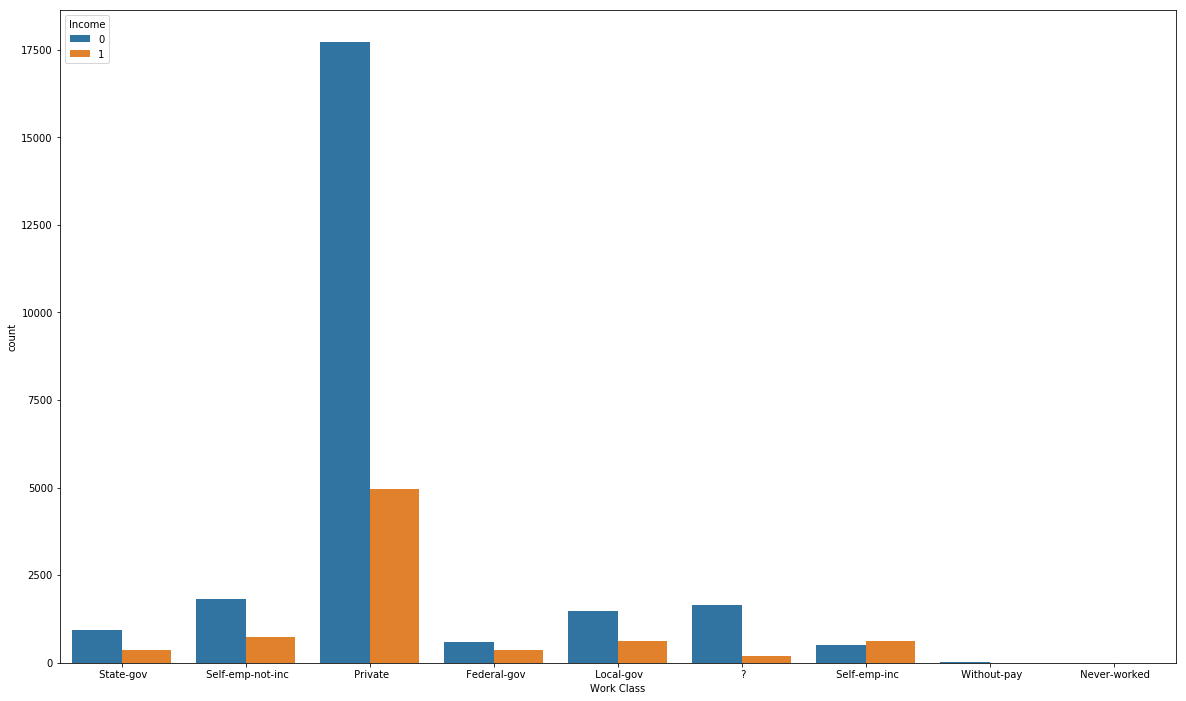

In [20]:
sns.countplot(x = 'Work Class', hue = 'Income', data = dataset)

In [21]:
dataset['Work Class'] = dataset['Work Class'].replace(" ?",dataset["Work Class"].value_counts().index[0])

In [22]:
dataset['Occupation'] = dataset['Occupation'].replace(" ?",dataset["Occupation"].value_counts().index[0])

In [23]:
dataset['Country'] = dataset['Country'].replace(" ?",dataset["Country"].value_counts().index[0])

In [24]:
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Never-worked'].index)

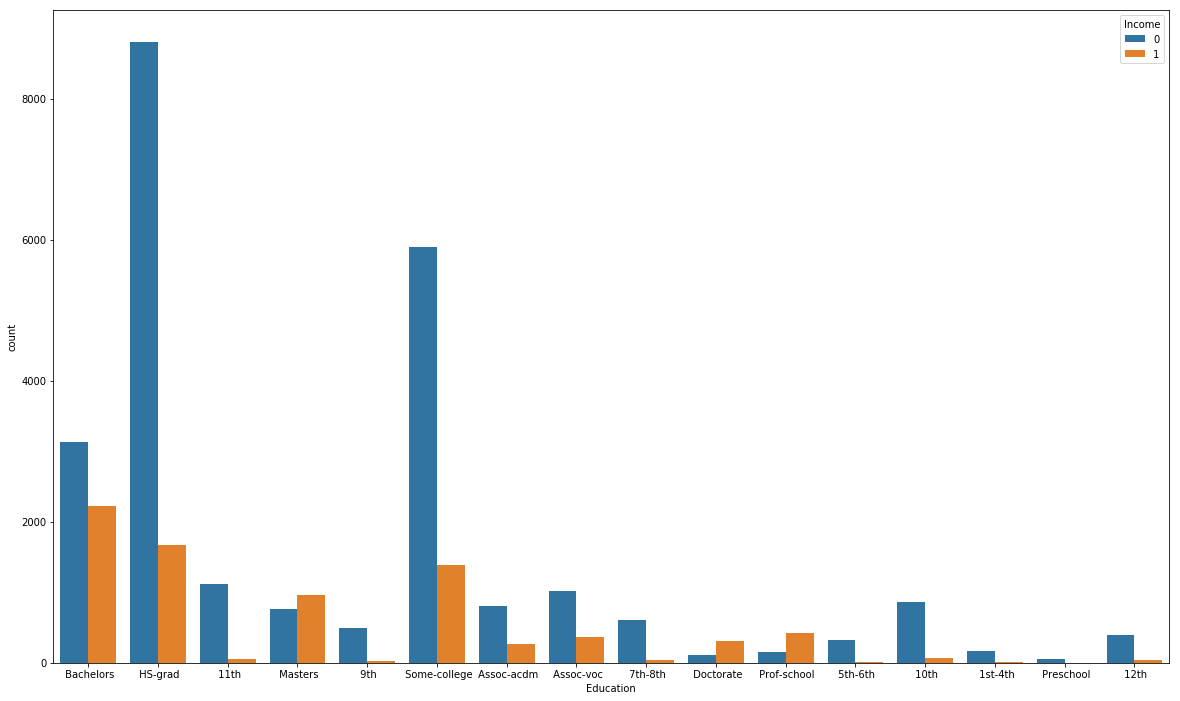

In [25]:
sns.countplot(x = 'Education', hue = 'Income', data = dataset)

In [26]:
education_classes = dataset['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, dataset[dataset['Education'] == edu_class]['Education Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


In [27]:
dataset.drop(['Education Number'], axis = 1, inplace = True)
dataset['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
dataset['Education'].value_counts()

 HS-grad         10491
 Some-college     7286
 Bachelors        5355
 School           4248
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1066
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

In [28]:
dataset['Marital Status'].value_counts()

 Married-civ-spouse       14967
 Never-married            10674
 Divorced                  4442
 Separated                 1025
 Widowed                    992
 Married-spouse-absent      417
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [29]:
dataset['Relationship'].value_counts()

 Husband           13189
 Not-in-family      8304
 Own-child          5058
 Unmarried          3444
 Wife               1564
 Other-relative      981
Name: Relationship, dtype: int64

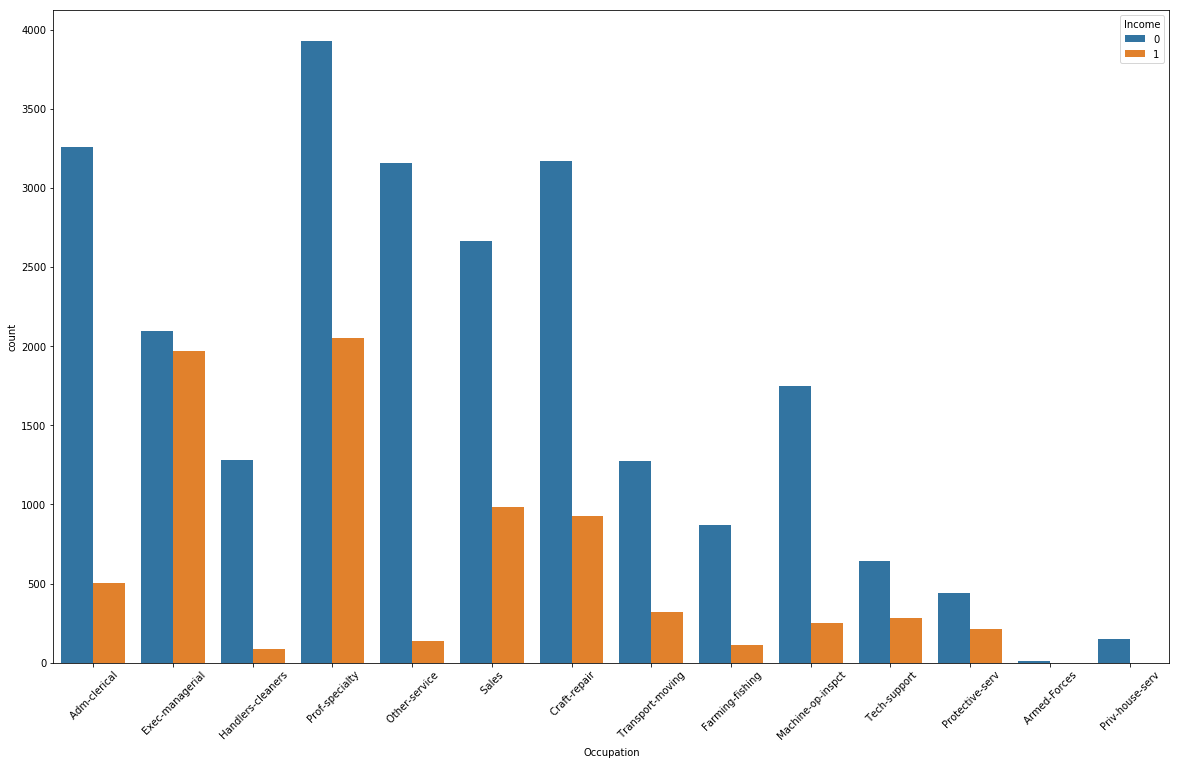

In [30]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = dataset)

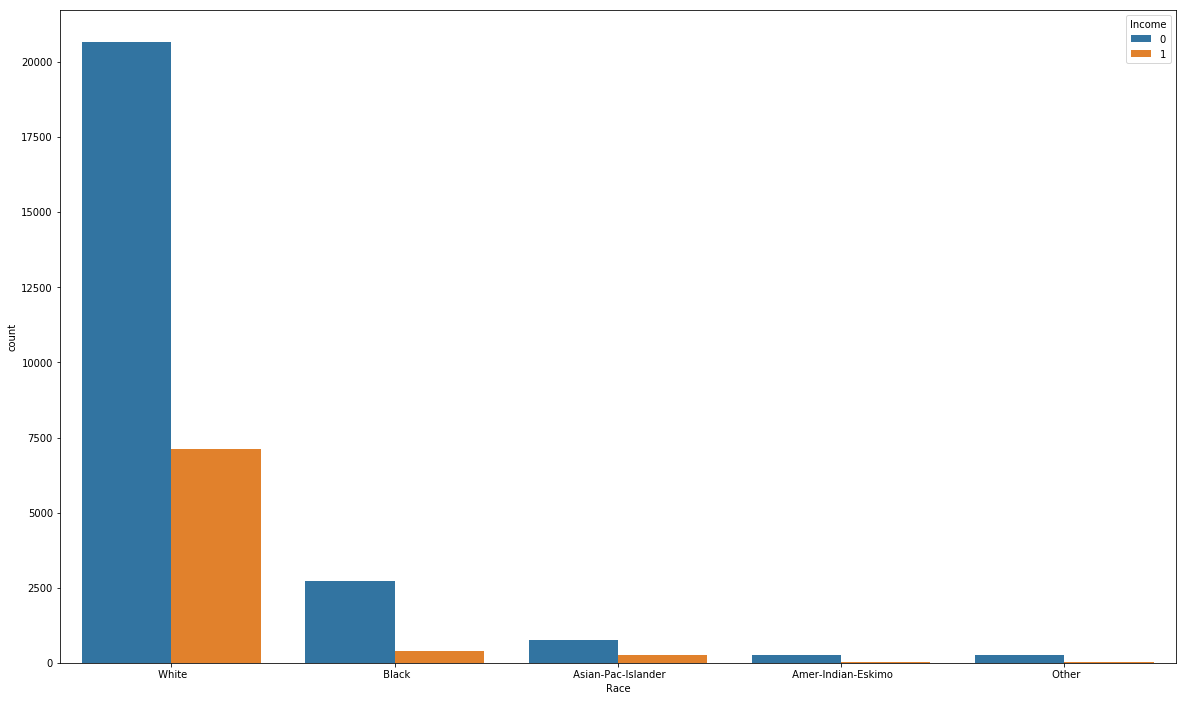

In [31]:
sns.countplot(x = 'Race', hue = 'Income', data = dataset)

In [32]:
dataset['Race'].unique()
dataset['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

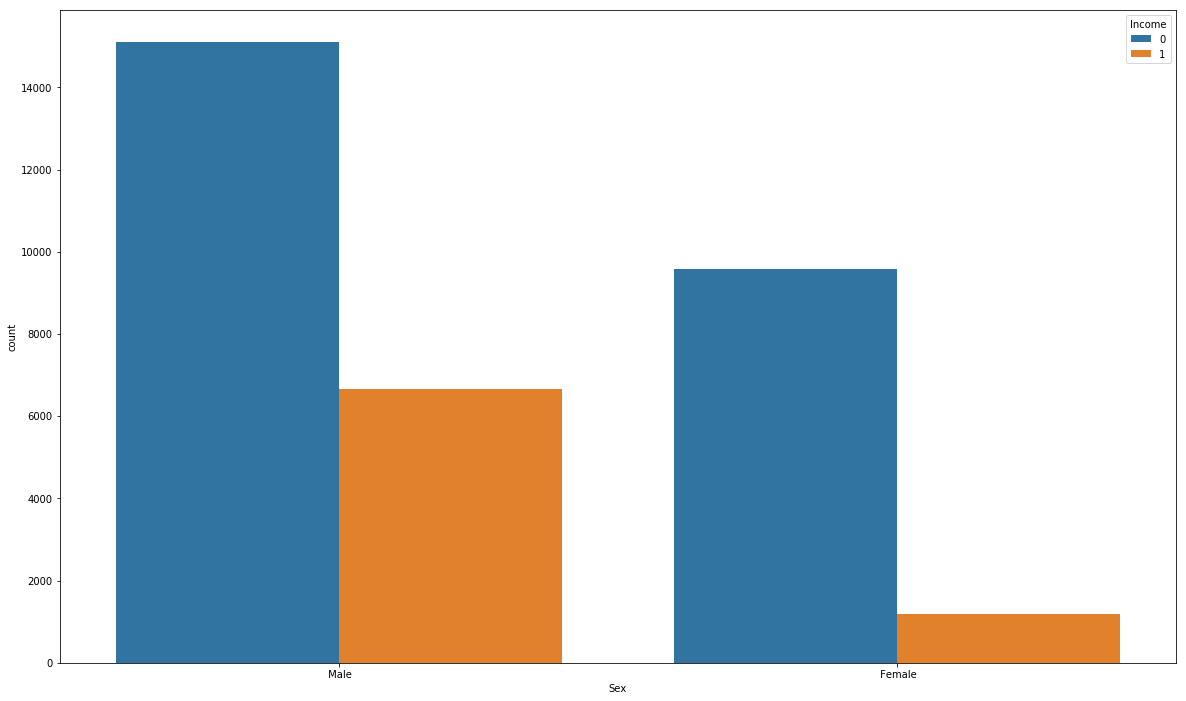

In [33]:
sns.countplot(x = 'Sex', hue = 'Income', data = dataset)

In [34]:
country_count = dataset['Country'].value_counts()
country_count

 United-States                 29733
 Mexico                          643
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

Text(0.5, 1.0, 'Total adults from each Country')

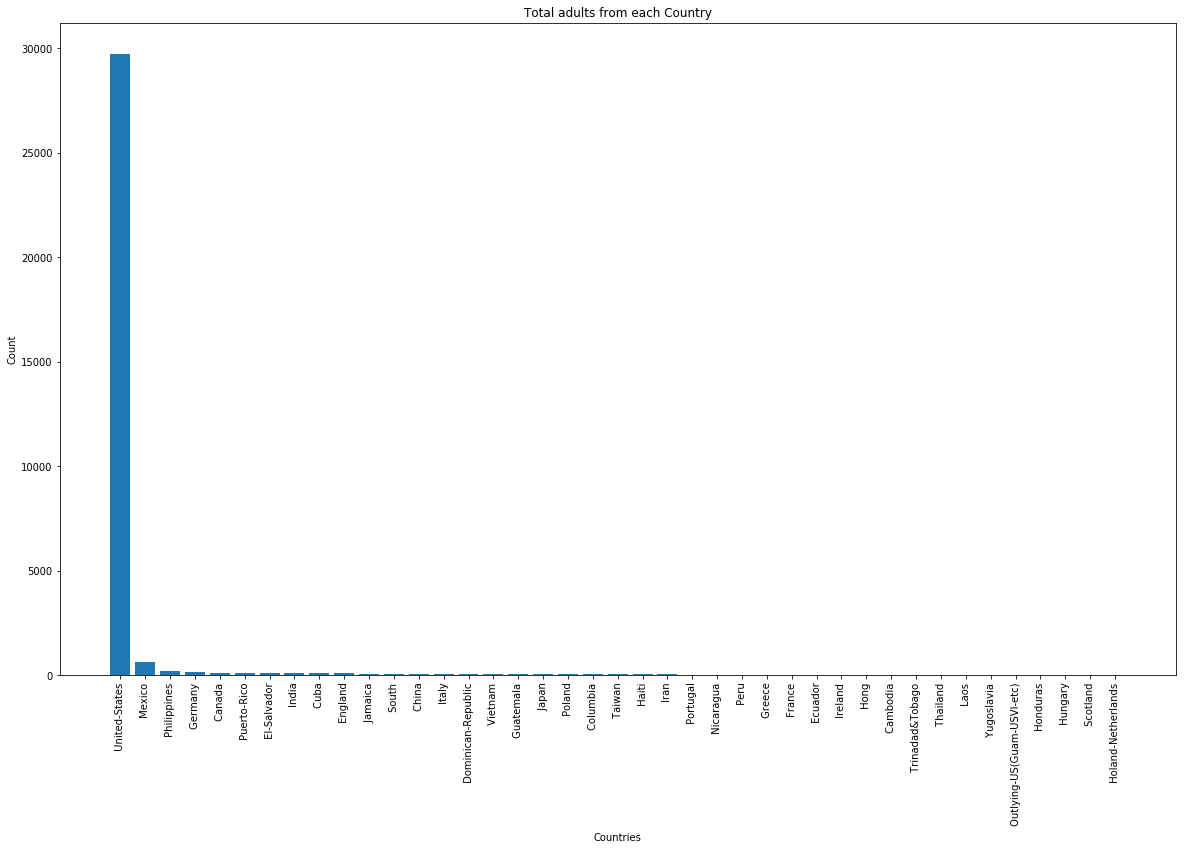

In [35]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [36]:
countries = np.array(dataset['Country'].unique())
countries = np.delete(countries, 0)

In [37]:
dataset['Country'].replace(countries, 'Other', inplace = True)

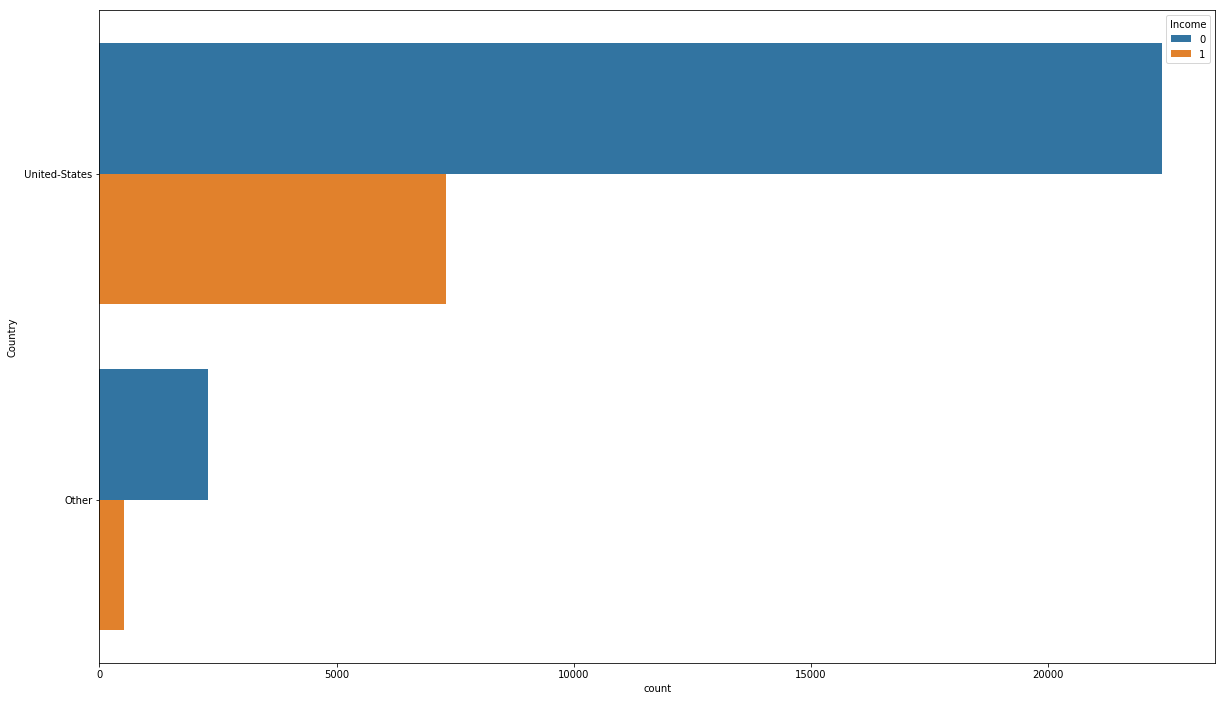

In [38]:
sns.countplot(y = 'Country', hue = 'Income', data = dataset)

In [39]:
y = dataset['Income']
X = dataset.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 56


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [41]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
classifiers = [GaussianNB(), 
               DecisionTreeClassifier(random_state = 0),  
               GradientBoostingClassifier(random_state = 0)]
classifier_names = [ "Naive Bayes", 
                    "Decision Tree Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []
conf = []

In [43]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)
    confe = confusion_matrix(y_test,y_pred)
    conf.append(confe)

Naive Bayes:
F1 score: 0.59
Decision Tree Classifier:
F1 score: 0.62
Gradient Boosting Classifier:
F1 score: 0.65


In [44]:
for i in range(len(classifiers)):
    classifier = classifier_names[i]
    accr = accuracies[i]
    print(f"{classifier} : {accr}")

Naive Bayes : 69.25834869903709
Decision Tree Classifier : 82.83138701085842
Gradient Boosting Classifier : 84.99282933825036


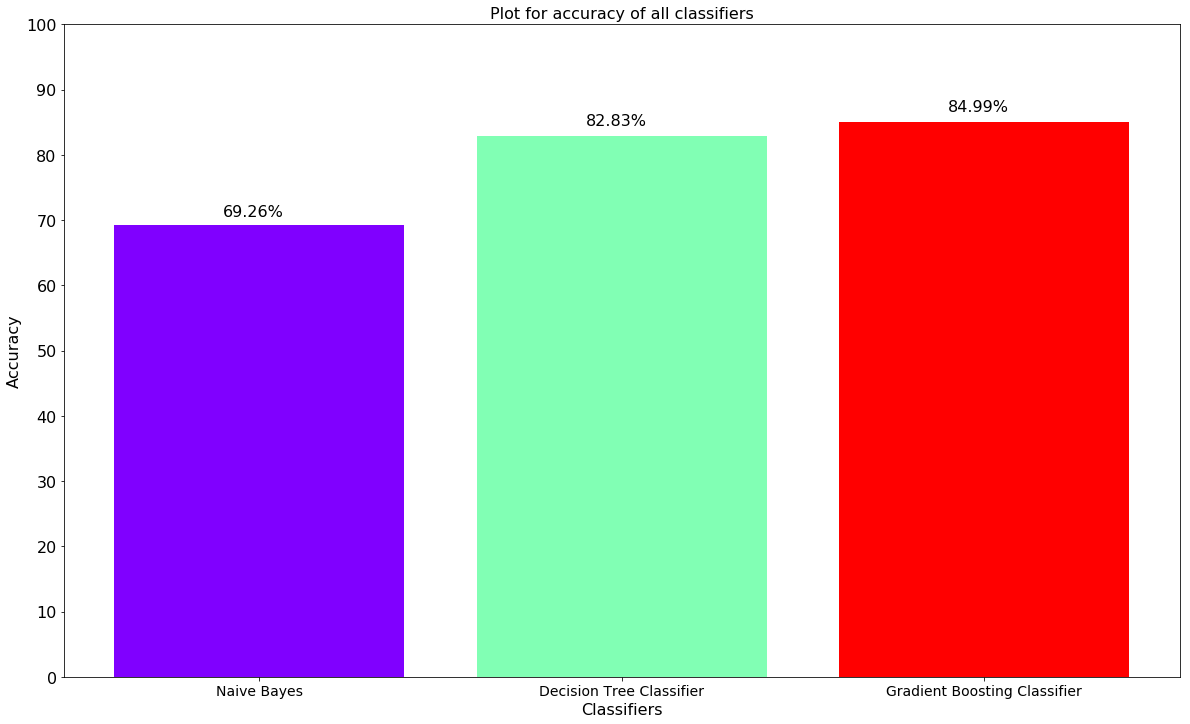

In [51]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2-0.1 , 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

In [46]:
for i in range(len(classifiers)):
    classs = classifier_names[i]
    confs = conf[i]
    print(f"{classs} : {confs}")

Naive Bayes : [[4563 2843]
 [ 158 2198]]
Decision Tree Classifier : [[6736  670]
 [1006 1350]]
Gradient Boosting Classifier : [[6932  474]
 [ 991 1365]]


In [47]:
dataset

,Age,Work Class,Education,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Country,Income,Capital Diff
0,Adult,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Normal Hours,United-States,0,Minor
1,Adult,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lesser Hours,United-States,0,Minor
2,Adult,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hours,United-States,0,Minor
3,Old,Private,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,Normal Hours,United-States,0,Minor
4,Adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,Normal Hours,Other,0,Minor
5,Adult,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal Hours,United-States,0,Minor
6,Adult,Private,School,Married-spouse-absent,Other-service,Not-in-family,Other,Female,Lesser Hours,Other,0,Minor
7,Old,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,Extra Hours,United-States,1,Minor
8,Adult,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,Extra Hours,United-States,1,Major
9,Adult,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Normal Hours,United-States,1,Major
